In [101]:
import pandas as pd
data=pd.read_csv("data2janvier.csv",sep=";")
data

,Type,ArrivalTime,LES,NAgent,Lf1,Lf2,Lf3,Lf4,Lf5,Lf6,Lf7,Lf8,WaitingTime
0,30175,28980.0,0.0,0,1,0,0,0,0,0,0,0,120.0
1,30560,29040.0,0.0,1,0,1,0,0,0,0,0,0,300.0
2,30175,29280.0,120.0,2,1,0,0,0,0,0,0,0,120.0
3,30175,29340.0,120.0,4,1,0,0,0,0,0,0,0,240.0
4,30172,29280.0,540.0,2,0,0,1,0,0,0,0,0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,30179,42780.0,360.0,58,0,0,0,0,1,0,0,0,360.0
1321,30066,42780.0,60.0,58,0,0,0,0,0,1,0,0,360.0
1322,30179,42840.0,360.0,69,0,0,0,0,1,0,0,0,300.0
1323,30560,43080.0,240.0,77,0,1,0,0,0,0,0,0,60.0


In [102]:
data=data.drop(["ArrivalTime","LES","NAgent","Lf1","Lf2","Lf3","Lf4","Lf5","Lf6","Lf7","Lf8"], axis=1)

In [103]:
data

,Type,WaitingTime
0,30175,120.0
1,30560,300.0
2,30175,120.0
3,30175,240.0
4,30172,360.0
...,...,...
1320,30179,360.0
1321,30066,360.0
1322,30179,300.0
1323,30560,60.0


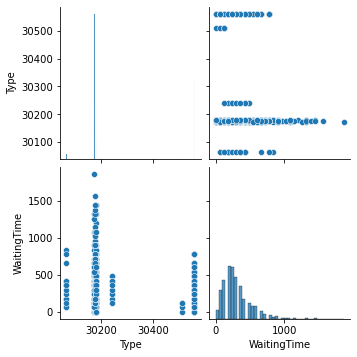

In [104]:
import seaborn as sns 
sns.pairplot(data)

Le WaitingTime pour chaque services

In [105]:
Y= data['WaitingTime']

In [106]:
Y

0       120.0
1       300.0
2       120.0
3       240.0
4       360.0
        ...  
1320    360.0
1321    360.0
1322    300.0
1323     60.0
1324     60.0
Name: WaitingTime, Length: 1325, dtype: float64

Les différents types de services

In [107]:
X= data['Type']

In [110]:
X

0       30175
1       30560
2       30175
3       30175
4       30172
        ...  
1320    30179
1321    30066
1322    30179
1323    30560
1324    30560
Name: Type, Length: 1325, dtype: int64

Essayons de prédire le WaitingTime pour chaque services avec le model RandomForestClassifier()

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier

80% de données dans le train-set et 20% de données dans le test-set

In [117]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

# Transformer

In [119]:
encoder =preprocessing.LabelEncoder()
X_train_transformed = encoder.fit_transform(X_train)
X_train_transformed
X_test_transformed = encoder.fit_transform(X_test)
X_test_transformed

array([6, 6, 5, 2, 6, 6, 6, 2, 1, 2, 1, 2, 2, 3, 2, 2, 6, 2, 4, 1, 3, 2,
       2, 2, 4, 2, 2, 2, 2, 6, 6, 2, 4, 3, 2, 6, 3, 2, 2, 2, 3, 1, 1, 2,
       6, 6, 2, 6, 4, 6, 6, 2, 2, 2, 1, 2, 2, 2, 6, 2, 6, 2, 2, 3, 2, 6,
       1, 2, 2, 4, 4, 4, 4, 2, 2, 6, 4, 1, 2, 6, 6, 2, 2, 2, 6, 2, 1, 3,
       6, 2, 6, 4, 2, 2, 4, 1, 2, 2, 2, 6, 6, 1, 4, 4, 2, 2, 2, 2, 2, 6,
       3, 6, 6, 3, 2, 3, 0, 4, 6, 4, 6, 2, 2, 2, 6, 2, 6, 6, 4, 1, 6, 4,
       6, 6, 2, 2, 2, 2, 6, 2, 4, 3, 6, 1, 6, 2, 2, 4, 6, 2, 2, 6, 2, 6,
       2, 3, 4, 6, 4, 2, 2, 2, 2, 6, 2, 2, 4, 1, 2, 6, 2, 4, 4, 4, 2, 4,
       0, 1, 2, 2, 3, 6, 1, 6, 6, 2, 1, 1, 1, 6, 3, 6, 2, 2, 2, 4, 1, 0,
       2, 4, 4, 2, 6, 2, 2, 2, 4, 2, 6, 2, 6, 6, 2, 3, 4, 2, 6, 1, 2, 2,
       4, 2, 4, 6, 0, 4, 1, 6, 6, 4, 6, 1, 2, 6, 6, 4, 6, 3, 2, 2, 2, 2,
       0, 4, 2, 2, 4, 2, 2, 1, 4, 2, 1, 1, 2, 3, 2, 4, 5, 3, 4, 2, 4, 2,
       2], dtype=int32)

Estimator 

In [ ]:
model=RandomForestClassifier()
model.fit(X_train_transformed,Y_train)

Prédiction

In [ ]:
y_pred = model.predict((X_test_transformed)
data= y_pred

In [124]:
import seaborn as sns 